In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from googletrans import Translator
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('israel data.csv', low_memory = False) 

In [3]:
data

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2021-10-24,0,0,0,0,0,שלילי,NaN,נקבה,Other
1,2021-10-24,0,0,0,0,0,שלילי,NaN,NaN,Other
2,2021-10-24,0,0,0,0,0,שלילי,NaN,נקבה,Other
3,2021-10-24,0,0,0,0,0,שלילי,NaN,NaN,Other
4,2021-10-24,0,0,0,0,0,שלילי,NaN,NaN,Other
...,...,...,...,...,...,...,...,...,...,...
7651048,2020-03-11,0,0,0,0,1,שלילי,NaN,נקבה,Abroad
7651049,2020-03-11,1,1,1,0,0,שלילי,NaN,נקבה,Abroad
7651050,2020-03-11,0,1,0,1,0,שלילי,NaN,זכר,Other
7651051,2020-03-11,0,0,0,0,0,שלילי,NaN,זכר,Other


In [4]:
data.describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache
count,7.651053e+06,7.651053e+06,7.651053e+06,7.651053e+06,7.651053e+06
mean,4.213211e-02,3.497911e-02,1.650113e-02,4.092116e-03,3.399205e-02
std,2.008905e-01,1.837269e-01,1.273925e-01,6.383864e-02,1.812087e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [5]:
data.dtypes

test_date              object
cough                   int64
fever                   int64
sore_throat             int64
shortness_of_breath     int64
head_ache               int64
corona_result          object
age_60_and_above       object
gender                 object
test_indication        object
dtype: object

In [6]:
translator = Translator()

In [7]:
data['corona_result'].unique()

array(['שלילי', 'אחר', 'חיובי'], dtype=object)

In [8]:
data['gender'].unique()

array(['נקבה', nan, 'זכר'], dtype=object)

In [9]:
data.corona_result = data.corona_result.replace('חיובי','positive')
data.corona_result = data.corona_result.replace('שלילי','negative')
data.corona_result = data.corona_result.replace('אחר','other')
data.gender = data.gender.replace('נקבה','female')
data.gender = data.gender.replace('זכר','male')

In [10]:
data

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2021-10-24,0,0,0,0,0,negative,NaN,female,Other
1,2021-10-24,0,0,0,0,0,negative,NaN,NaN,Other
2,2021-10-24,0,0,0,0,0,negative,NaN,female,Other
3,2021-10-24,0,0,0,0,0,negative,NaN,NaN,Other
4,2021-10-24,0,0,0,0,0,negative,NaN,NaN,Other
...,...,...,...,...,...,...,...,...,...,...
7651048,2020-03-11,0,0,0,0,1,negative,NaN,female,Abroad
7651049,2020-03-11,1,1,1,0,0,negative,NaN,female,Abroad
7651050,2020-03-11,0,1,0,1,0,negative,NaN,male,Other
7651051,2020-03-11,0,0,0,0,0,negative,NaN,male,Other


In [11]:
data['test_indication'].unique()

array(['Other', 'Contact with confirmed', 'Abroad'], dtype=object)

In [12]:
data.dropna(inplace=True)

In [13]:
data

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
113976,2021-10-11,0,0,0,0,0,negative,Yes,female,Other
113977,2021-10-11,0,0,0,0,0,negative,No,male,Other
113978,2021-10-11,0,0,0,0,0,negative,No,female,Other
113979,2021-10-11,0,0,0,0,0,negative,No,female,Other
113980,2021-10-11,0,0,0,0,0,negative,No,male,Other
...,...,...,...,...,...,...,...,...,...,...
7640100,2020-03-20,0,0,0,0,0,negative,No,male,Other
7640101,2020-03-20,0,0,0,0,0,negative,No,male,Other
7640102,2020-03-20,0,0,0,0,0,negative,No,female,Other
7640103,2020-03-20,0,0,0,0,0,negative,No,female,Other


In [14]:
data['test_date'] = pd.to_datetime(data.test_date)

In [15]:
data['gender'].unique()

array(['female', 'male'], dtype=object)

In [16]:
data['corona_result'].unique()
data = data.loc[data["corona_result"] != 'other']

In [17]:
data

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
113976,2021-10-11,0,0,0,0,0,negative,Yes,female,Other
113977,2021-10-11,0,0,0,0,0,negative,No,male,Other
113978,2021-10-11,0,0,0,0,0,negative,No,female,Other
113979,2021-10-11,0,0,0,0,0,negative,No,female,Other
113980,2021-10-11,0,0,0,0,0,negative,No,male,Other
...,...,...,...,...,...,...,...,...,...,...
7640100,2020-03-20,0,0,0,0,0,negative,No,male,Other
7640101,2020-03-20,0,0,0,0,0,negative,No,male,Other
7640102,2020-03-20,0,0,0,0,0,negative,No,female,Other
7640103,2020-03-20,0,0,0,0,0,negative,No,female,Other


In [18]:
data.describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache
count,5.841176e+06,5.841176e+06,5.841176e+06,5.841176e+06,5.841176e+06
mean,4.663650e-02,3.890706e-02,1.884295e-02,4.547372e-03,3.903700e-02
std,2.108591e-01,1.933735e-01,1.359702e-01,6.728071e-02,1.936830e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [19]:
data[data['test_indication'] == 'Contact with confirmed']['corona_result'].value_counts(normalize=True)

negative    0.560874
positive    0.439126
Name: corona_result, dtype: float64

In [20]:
data[data['test_indication'] != 'Contact with confirmed']['corona_result'].value_counts(normalize=True)

negative    0.94564
positive    0.05436
Name: corona_result, dtype: float64

In [21]:
data[data['age_60_and_above'] == 'Yes']['corona_result'].value_counts(normalize=True)

negative    0.919421
positive    0.080579
Name: corona_result, dtype: float64

In [22]:
data[data['age_60_and_above'] != 'Yes']['corona_result'].value_counts(normalize=True)

negative    0.913218
positive    0.086782
Name: corona_result, dtype: float64

In [23]:
data[data['cough'] == 1]['corona_result'].value_counts(normalize=True)

negative    0.620971
positive    0.379029
Name: corona_result, dtype: float64

In [24]:
data[data['cough'] == 0]['corona_result'].value_counts(normalize=True)

negative    0.928323
positive    0.071677
Name: corona_result, dtype: float64

In [25]:
data[data['fever'] == 1]['corona_result'].value_counts(normalize=True)

negative    0.58159
positive    0.41841
Name: corona_result, dtype: float64

In [26]:
data[data['fever'] == 0]['corona_result'].value_counts(normalize=True)

negative    0.927446
positive    0.072554
Name: corona_result, dtype: float64

In [27]:
data[data['head_ache'] == 1]['corona_result'].value_counts(normalize=True)

negative    0.565209
positive    0.434791
Name: corona_result, dtype: float64

In [28]:
data[data['head_ache'] == 0]['corona_result'].value_counts(normalize=True)

negative    0.928158
positive    0.071842
Name: corona_result, dtype: float64

In [29]:
data[data['sore_throat'] == 1]['corona_result'].value_counts(normalize=True)

negative    0.569536
positive    0.430464
Name: corona_result, dtype: float64

In [30]:
data[data['sore_throat'] == 0]['corona_result'].value_counts(normalize=True)

negative    0.920605
positive    0.079395
Name: corona_result, dtype: float64

In [31]:
data[data['shortness_of_breath'] == 1]['corona_result'].value_counts(normalize=True)

positive    0.511972
negative    0.488028
Name: corona_result, dtype: float64

In [32]:
data[data['shortness_of_breath'] == 0]['corona_result'].value_counts(normalize=True)

negative    0.915935
positive    0.084065
Name: corona_result, dtype: float64

In [33]:
data[data['gender'] == 'male']['corona_result'].value_counts(normalize=True)

negative    0.91143
positive    0.08857
Name: corona_result, dtype: float64

In [34]:
data[data['gender'] == 'female']['corona_result'].value_counts(normalize=True)

negative    0.916284
positive    0.083716
Name: corona_result, dtype: float64

In [35]:
data[data['test_indication'] == 'Abroad']['corona_result'].value_counts(normalize=True)

negative    0.888465
positive    0.111535
Name: corona_result, dtype: float64

In [36]:
data[data['test_indication'] != 'Abroad']['corona_result'].value_counts(normalize=True)

negative    0.914066
positive    0.085934
Name: corona_result, dtype: float64

In [37]:
data['corona_result'].value_counts(normalize = False)

negative    5338773
positive     502403
Name: corona_result, dtype: int64

In [38]:
one_hot = pd.get_dummies(data)
one_hot = one_hot.drop(['corona_result_negative', 'age_60_and_above_No', 'gender_female', 'test_indication_Other'], axis = 1)
one_hot.rename(columns={'shortness_of_breath': 'breath_issues', 'corona_result_positive': 'positive', 'age_60_and_above_Yes': 'age>=60', 'test_indication_Abroad':'abroad',
                       'test_indication_Contact with confirmed': 'contact_traced'}, inplace=True)

In [39]:
one_hot.describe()

,cough,fever,sore_throat,breath_issues,head_ache,positive,age>=60,gender_male,abroad,contact_traced
count,5.841176e+06,5.841176e+06,5.841176e+06,5.841176e+06,5.841176e+06,5.841176e+06,5.841176e+06,5.841176e+06,5.841176e+06,5.841176e+06
mean,4.663650e-02,3.890706e-02,1.884295e-02,4.547372e-03,3.903700e-02,8.601059e-02,1.243176e-01,4.727269e-01,3.010010e-03,8.225895e-02
std,2.108591e-01,1.933735e-01,1.359702e-01,6.728071e-02,1.936830e-01,2.803797e-01,3.299436e-01,4.992557e-01,5.478093e-02,2.747589e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


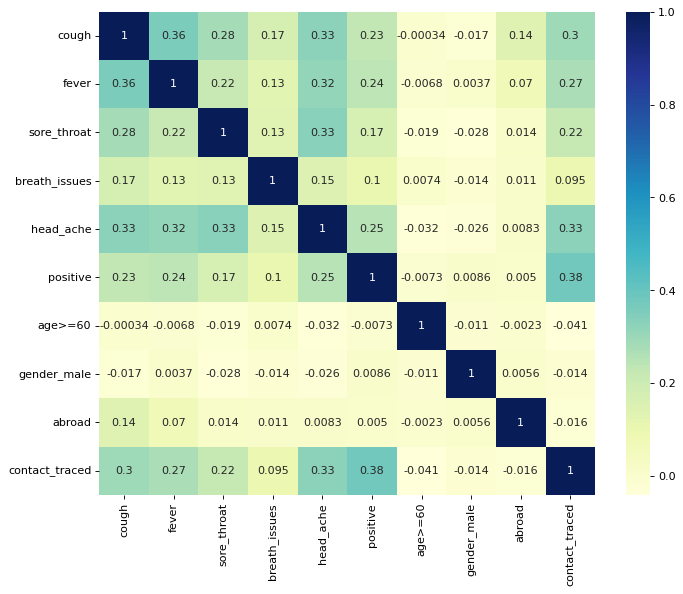

In [40]:
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80)
dataplot = sns.heatmap(one_hot.corr(), cmap="YlGnBu", annot=True)

In [41]:
grouped = one_hot.groupby(['test_date'])['positive'].agg('sum')

<AxesSubplot:xlabel='test_date', ylabel='positive'>

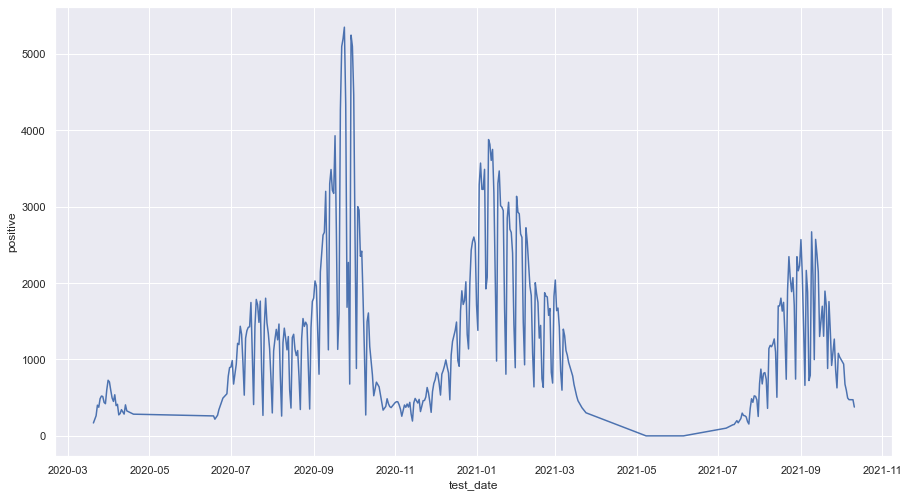

In [42]:
sns.set(rc={'figure.figsize':(15,8.27)})
sns.lineplot(data = grouped)

In [44]:
one_hot.sort_values('positive', inplace=True, ascending=False)
one_hot['positive'].value_counts()

0    5338773
1     502403
Name: positive, dtype: int64

In [45]:
dataset = one_hot.iloc[0:1004806]

In [46]:
dataset['positive'].value_counts()

1    502403
0    502403
Name: positive, dtype: int64

In [47]:
dataset = dataset.sample(frac=1)

In [48]:
dataset

,test_date,cough,fever,sore_throat,breath_issues,head_ache,positive,age>=60,gender_male,abroad,contact_traced
5884399,2020-09-14,0,0,0,0,0,1,0,0,0,0
2945762,2021-02-07,0,0,0,0,1,1,0,0,0,0
3532369,2021-01-09,0,1,1,0,0,1,0,0,0,0
2554779,2021-03-05,0,0,0,0,0,1,0,0,0,0
4231290,2020-12-16,1,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5589383,2020-09-25,0,0,0,0,0,1,0,1,0,1
6640498,2020-07-17,0,0,0,0,0,1,0,1,0,0
5587403,2020-09-25,0,0,0,0,0,0,0,0,0,0
5352678,2020-10-08,0,0,0,0,0,0,0,0,0,0


In [49]:
train, test = train_test_split(dataset, test_size=0.005)

In [50]:
yTr = train['positive']
yTe = test['positive']
xTr = train[['cough', 'fever', 'sore_throat', 'breath_issues', 'head_ache', 'abroad', 'contact_traced']]
xTe = test[['cough', 'fever', 'sore_throat', 'breath_issues', 'head_ache', 'abroad', 'contact_traced']]

In [51]:
model = LogisticRegression(random_state=0).fit(xTr, yTr)

In [52]:
model.predict(xTe)

array([1, 0, 1, ..., 1, 0, 0], dtype=uint8)

In [53]:
probs = model.predict_proba(xTe)
probs = probs[:,0]
probs

array([0.0826004 , 0.68071945, 0.10370666, ..., 0.10370666, 0.68071945,
       0.68071945])

In [54]:
model.score(xTe, yTe)

0.7727363184079602

In [55]:
ts = np.arange(0.001, 0.5, 0.001).tolist()
ts.reverse()

<AxesSubplot:>

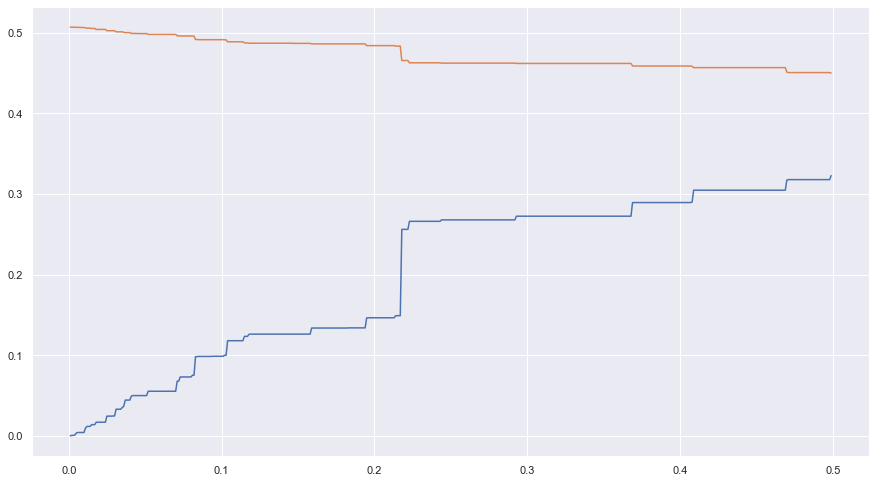

In [56]:
fps = np.zeros(len(ts))
fns = np.zeros(len(ts))
for i in range(len(ts)):
    preds = probs > ts[i]
    FP = np.logical_and(yTe != preds, preds == 1).sum()  
    FN = np.logical_and(yTe != preds, preds == 0).sum()

    FPR = FP/preds.shape[0]
    FNR = FN/preds.shape[0]
    
    fps[i] = FPR
    fns[i] = FNR
    

sns.lineplot(x = ts, y = fns)
sns.lineplot(x = ts, y = fps)

In [58]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [61]:
gbdt = HistGradientBoostingClassifier(learning_rate = 0.01, max_iter = 10000).fit(xTr, yTr)

In [62]:
gbdt.score(xTe, yTe)

0.7727363184079602

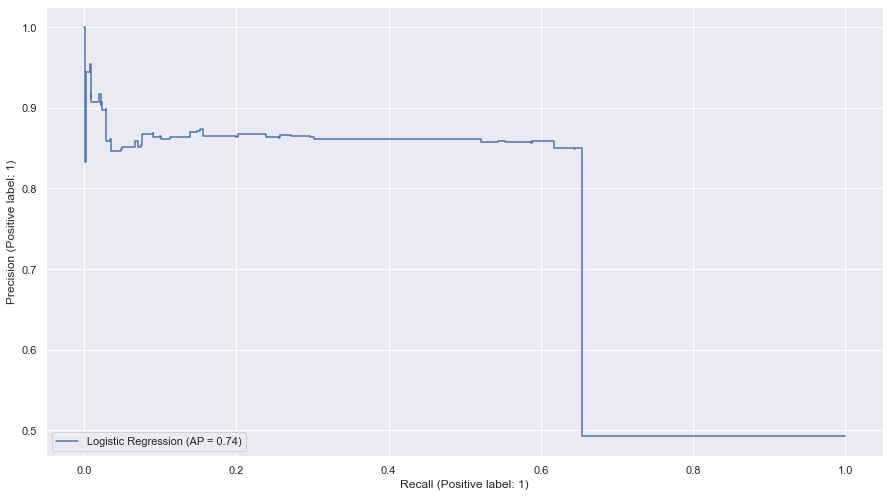

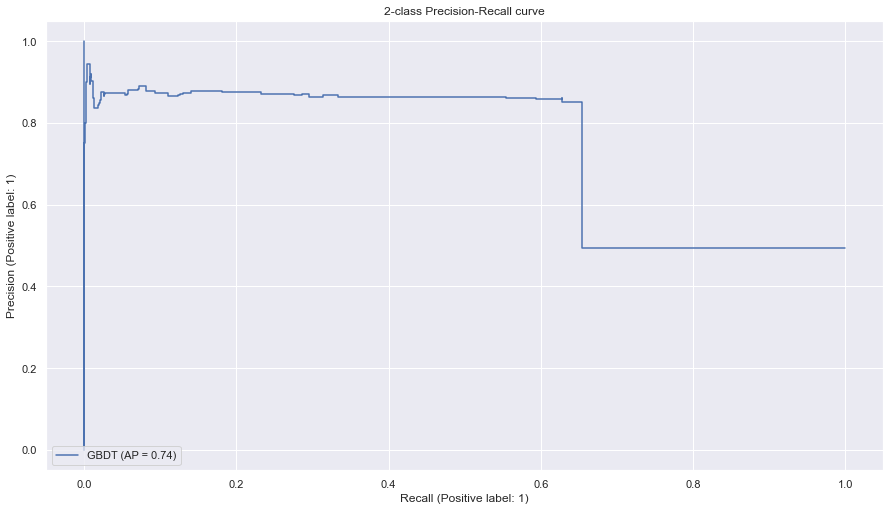

In [66]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(yTe, probs)
# sns.lineplot(x = recall, y = precision)
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    model, xTe, yTe, name="Logistic Regression"
)
display = PrecisionRecallDisplay.from_estimator(
    gbdt, xTe, yTe, name="GBDT"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [98]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(xTr, yTr)

KNeighborsClassifier(n_neighbors=3)

In [100]:
knn_model.predict(xTe)

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
knn_model.score(xTe, yTe)

In [ ]:
scores = np.zeros(19)
for k in range(1, 8, 1):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(xTr, yTr)
    scores[k - 1] = knn_model.score(xTe, yTe)

In [ ]:
sns.lineplot(x = np.array(range(1, 20, 1)), y = scores)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(min_samples_leaf = 8000)
tree.fit(xTr, yTr)

In [ ]:
tree.score(xTe, yTe)

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

def draw_tree(tree):
    dot_data = export_graphviz(tree, out_file=None, 
                               feature_names=['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 'gender_male', 'test_indication_Abroad', 'test_indication_Contact with confirmed'], 
                               class_names=['positive', 'negative'],
                               filled=True, 
                               #impurity=True,
                               rounded=True,  
                               special_characters=True,
                               proportion = True)  #trying changing proportion = False
    
    graph = graphviz.Source(dot_data)
    graph.format = 'png'
    graph.render('tree',view=True)

In [ ]:
draw_tree(tree)

In [2]:
import xgboost